<a href="https://colab.research.google.com/github/pa-shk/embeddings_mixup/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets -q

# Load dataset and tokenizer

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

In [ ]:
dataset = load_dataset("rotten_tomatoes")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

# Check length of texts

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

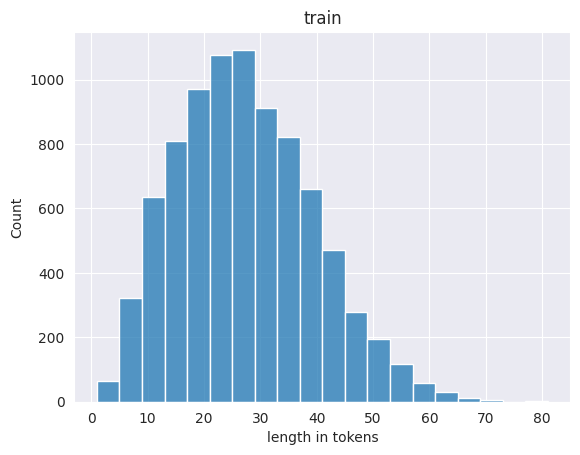

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

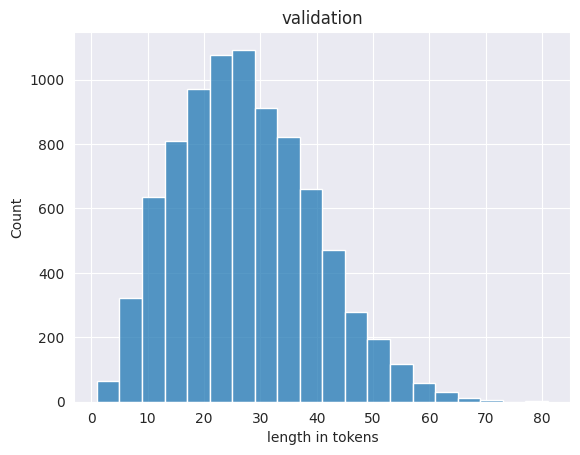

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

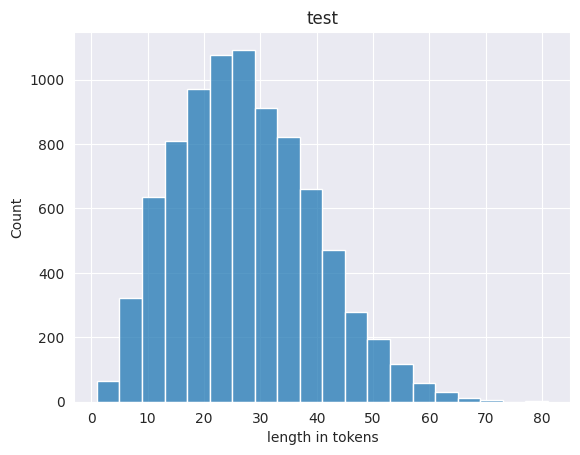

In [ ]:
def get_len(x):
    tokenized = tokenizer.tokenize(x['text'])
    lengths.append(len(tokenized))


for split in ['train', 'validation', 'test']:
    lengths = []
    dataset['train'].map(lambda x: get_len(x))
    hist = sns.histplot(lengths, bins=20)
    hist.set_xlabel('length in tokens')
    hist.set_title(split)
    plt.show()

# Check class distribution

In [ ]:
def count_labels(x):
    label = x['label']
    labels[0] += label == 0
    labels[1] += label == 1


for split in ['train', 'validation', 'test']:
    labels = {0: 0, 1: 0}
    dataset[split].map(lambda x: count_labels(x))
    print(split, labels)

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

train {0: 4265, 1: 4265}


Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

validation {0: 533, 1: 533}


Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

test {0: 533, 1: 533}
